In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     10   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2007        WD         Normal     128000  
1   2007        WD         Normal     268000  

[2 rows x 81 columns]

In [5]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [3]:
# Dropping unnecessary features from the dataset as most are null values in it

train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [5]:
##Filling out the remaining null Values in some of the other features

In [11]:
train['LotFrontage'].value_counts()

60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

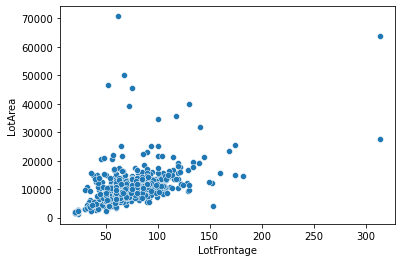

In [6]:
sns.scatterplot(x=train['LotFrontage'],y=train['LotArea'])

In [4]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors = 3)

In [5]:
train['LotFrontage']=knn.fit_transform(train[['LotArea','LotFrontage']])

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [6]:
train.fillna(method='ffill',inplace = True)

All null values are now filled

In [7]:
#Lets drop all the duplicate entries from the dataset.

train.drop_duplicates(inplace=True)

In [80]:
train.shape

(1168, 76)

*lets Analyse the data*

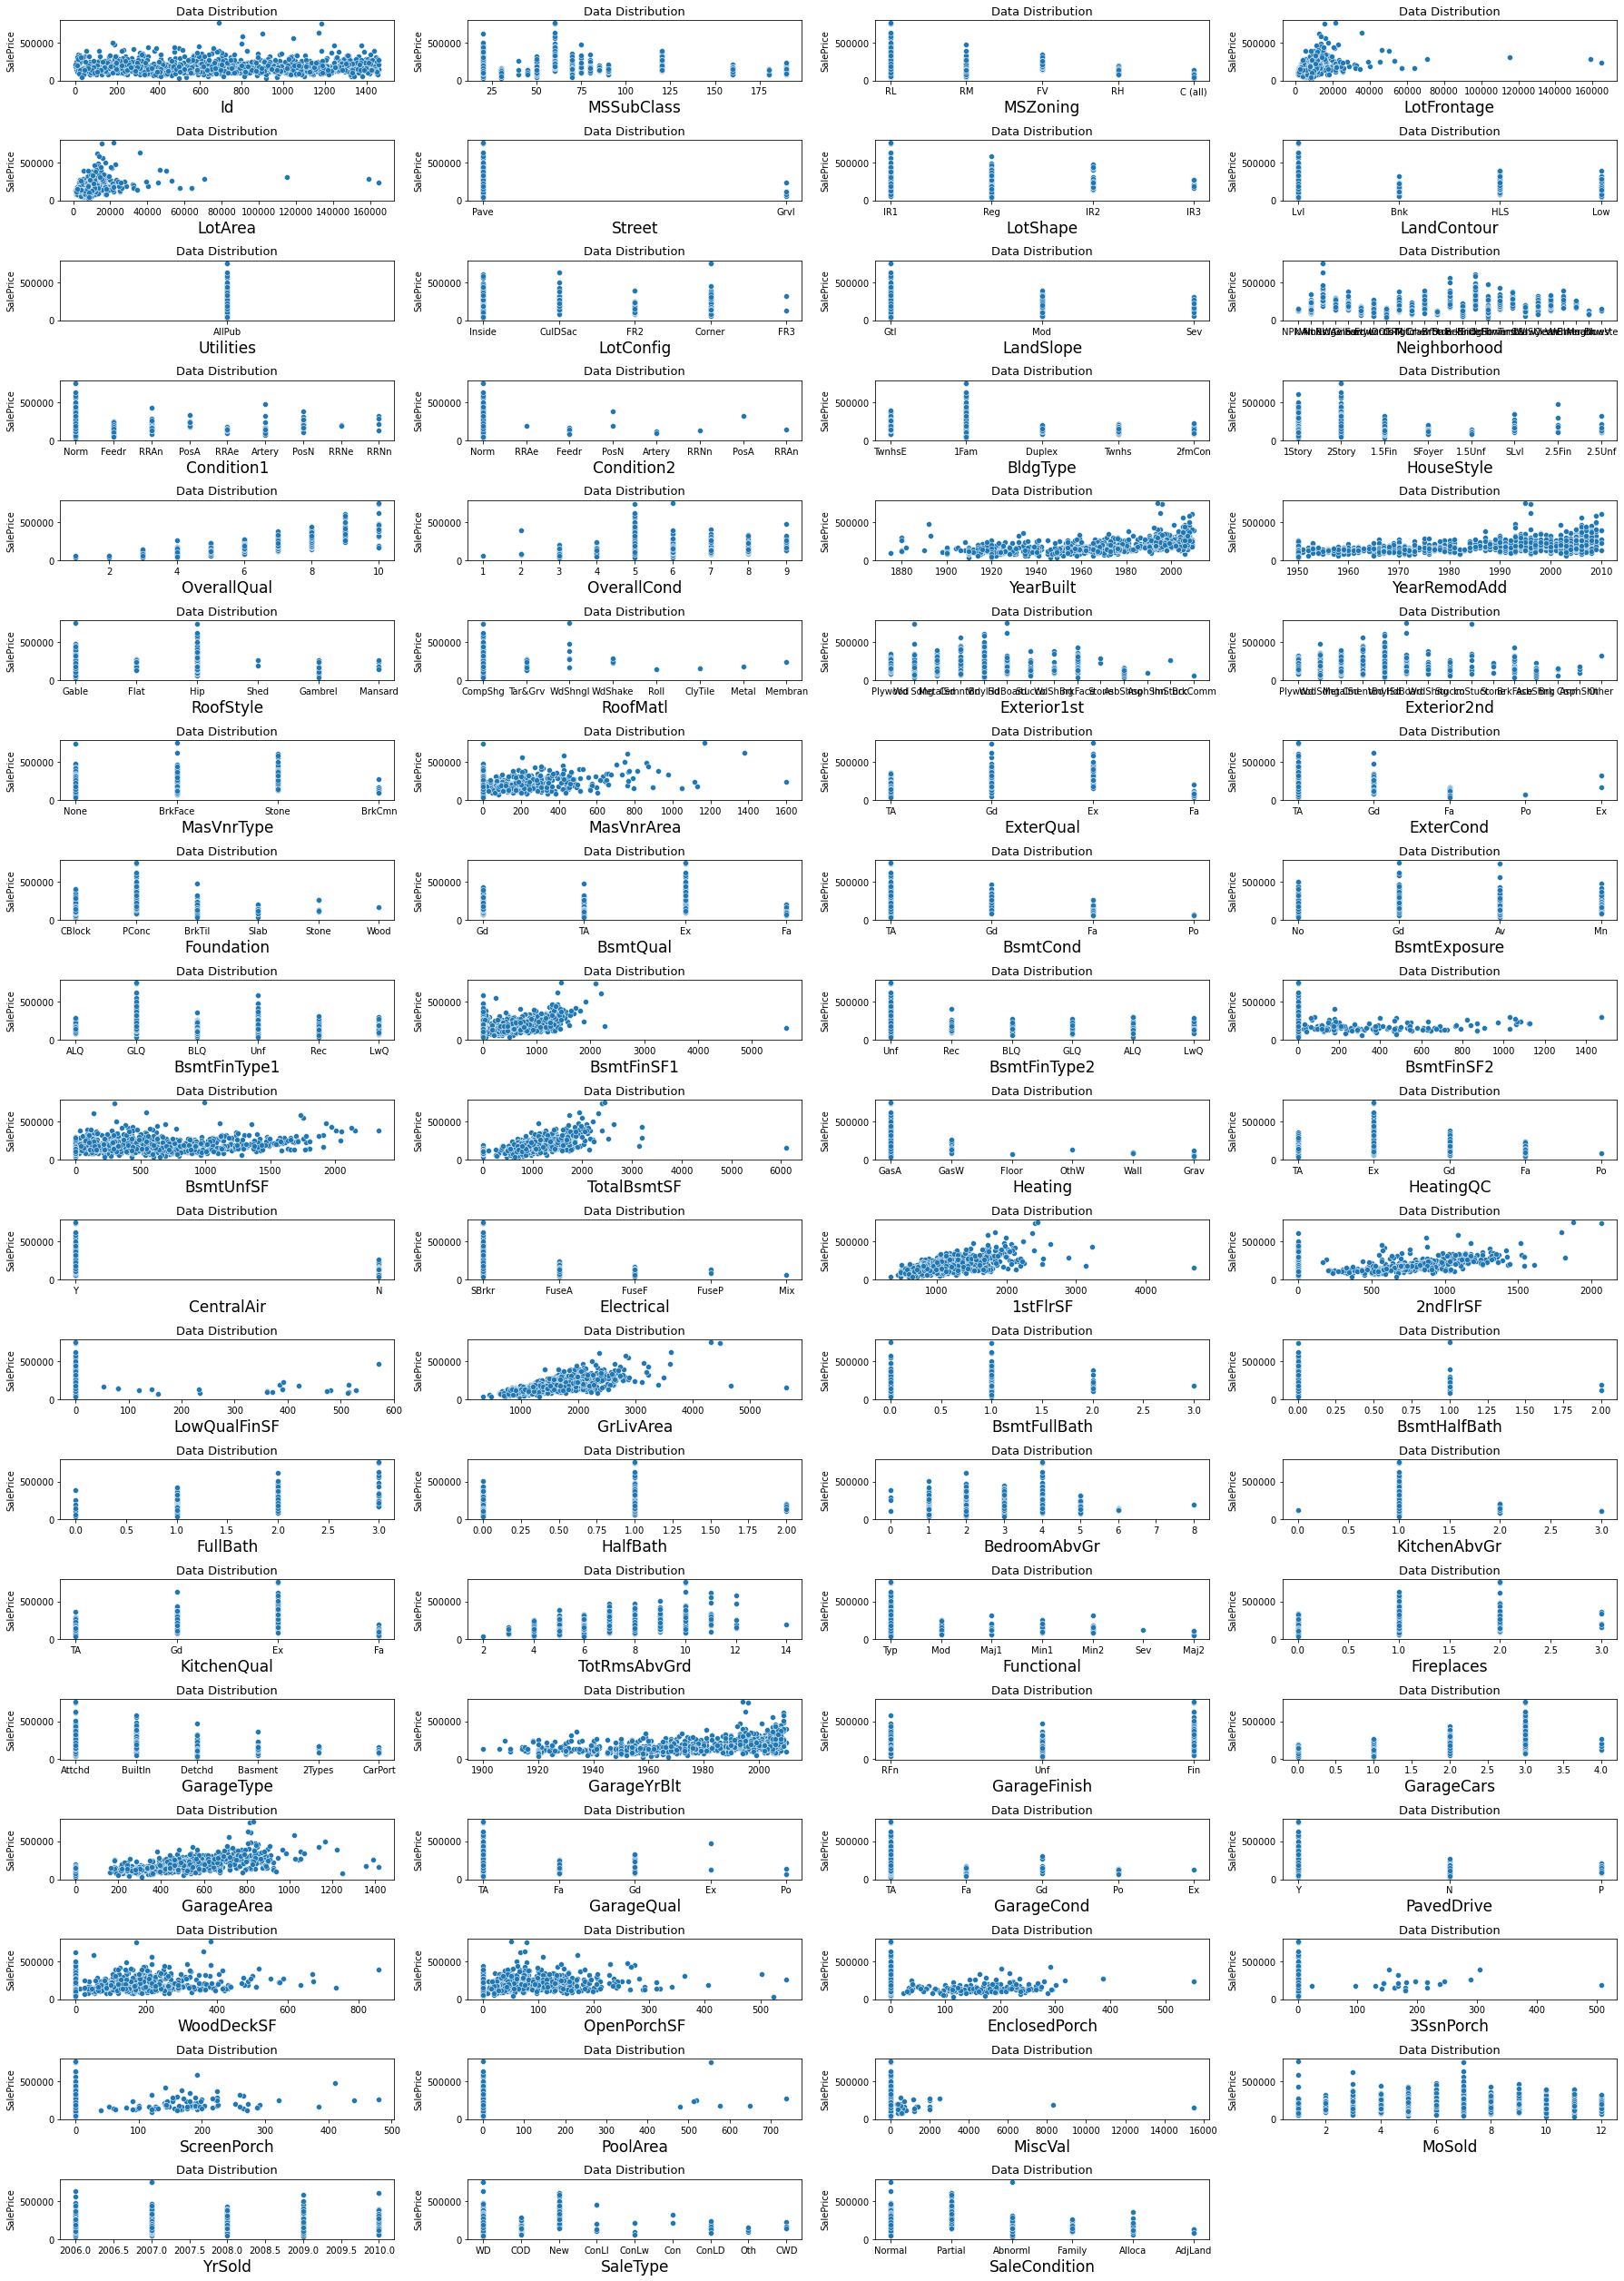

In [57]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in x:
    if plotnumber<=76:
        ax = plt.subplot(19,4,plotnumber)
        sns.scatterplot(x = train[column], y= train['SalePrice'])
        plt.xlabel(column, fontsize = 17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()

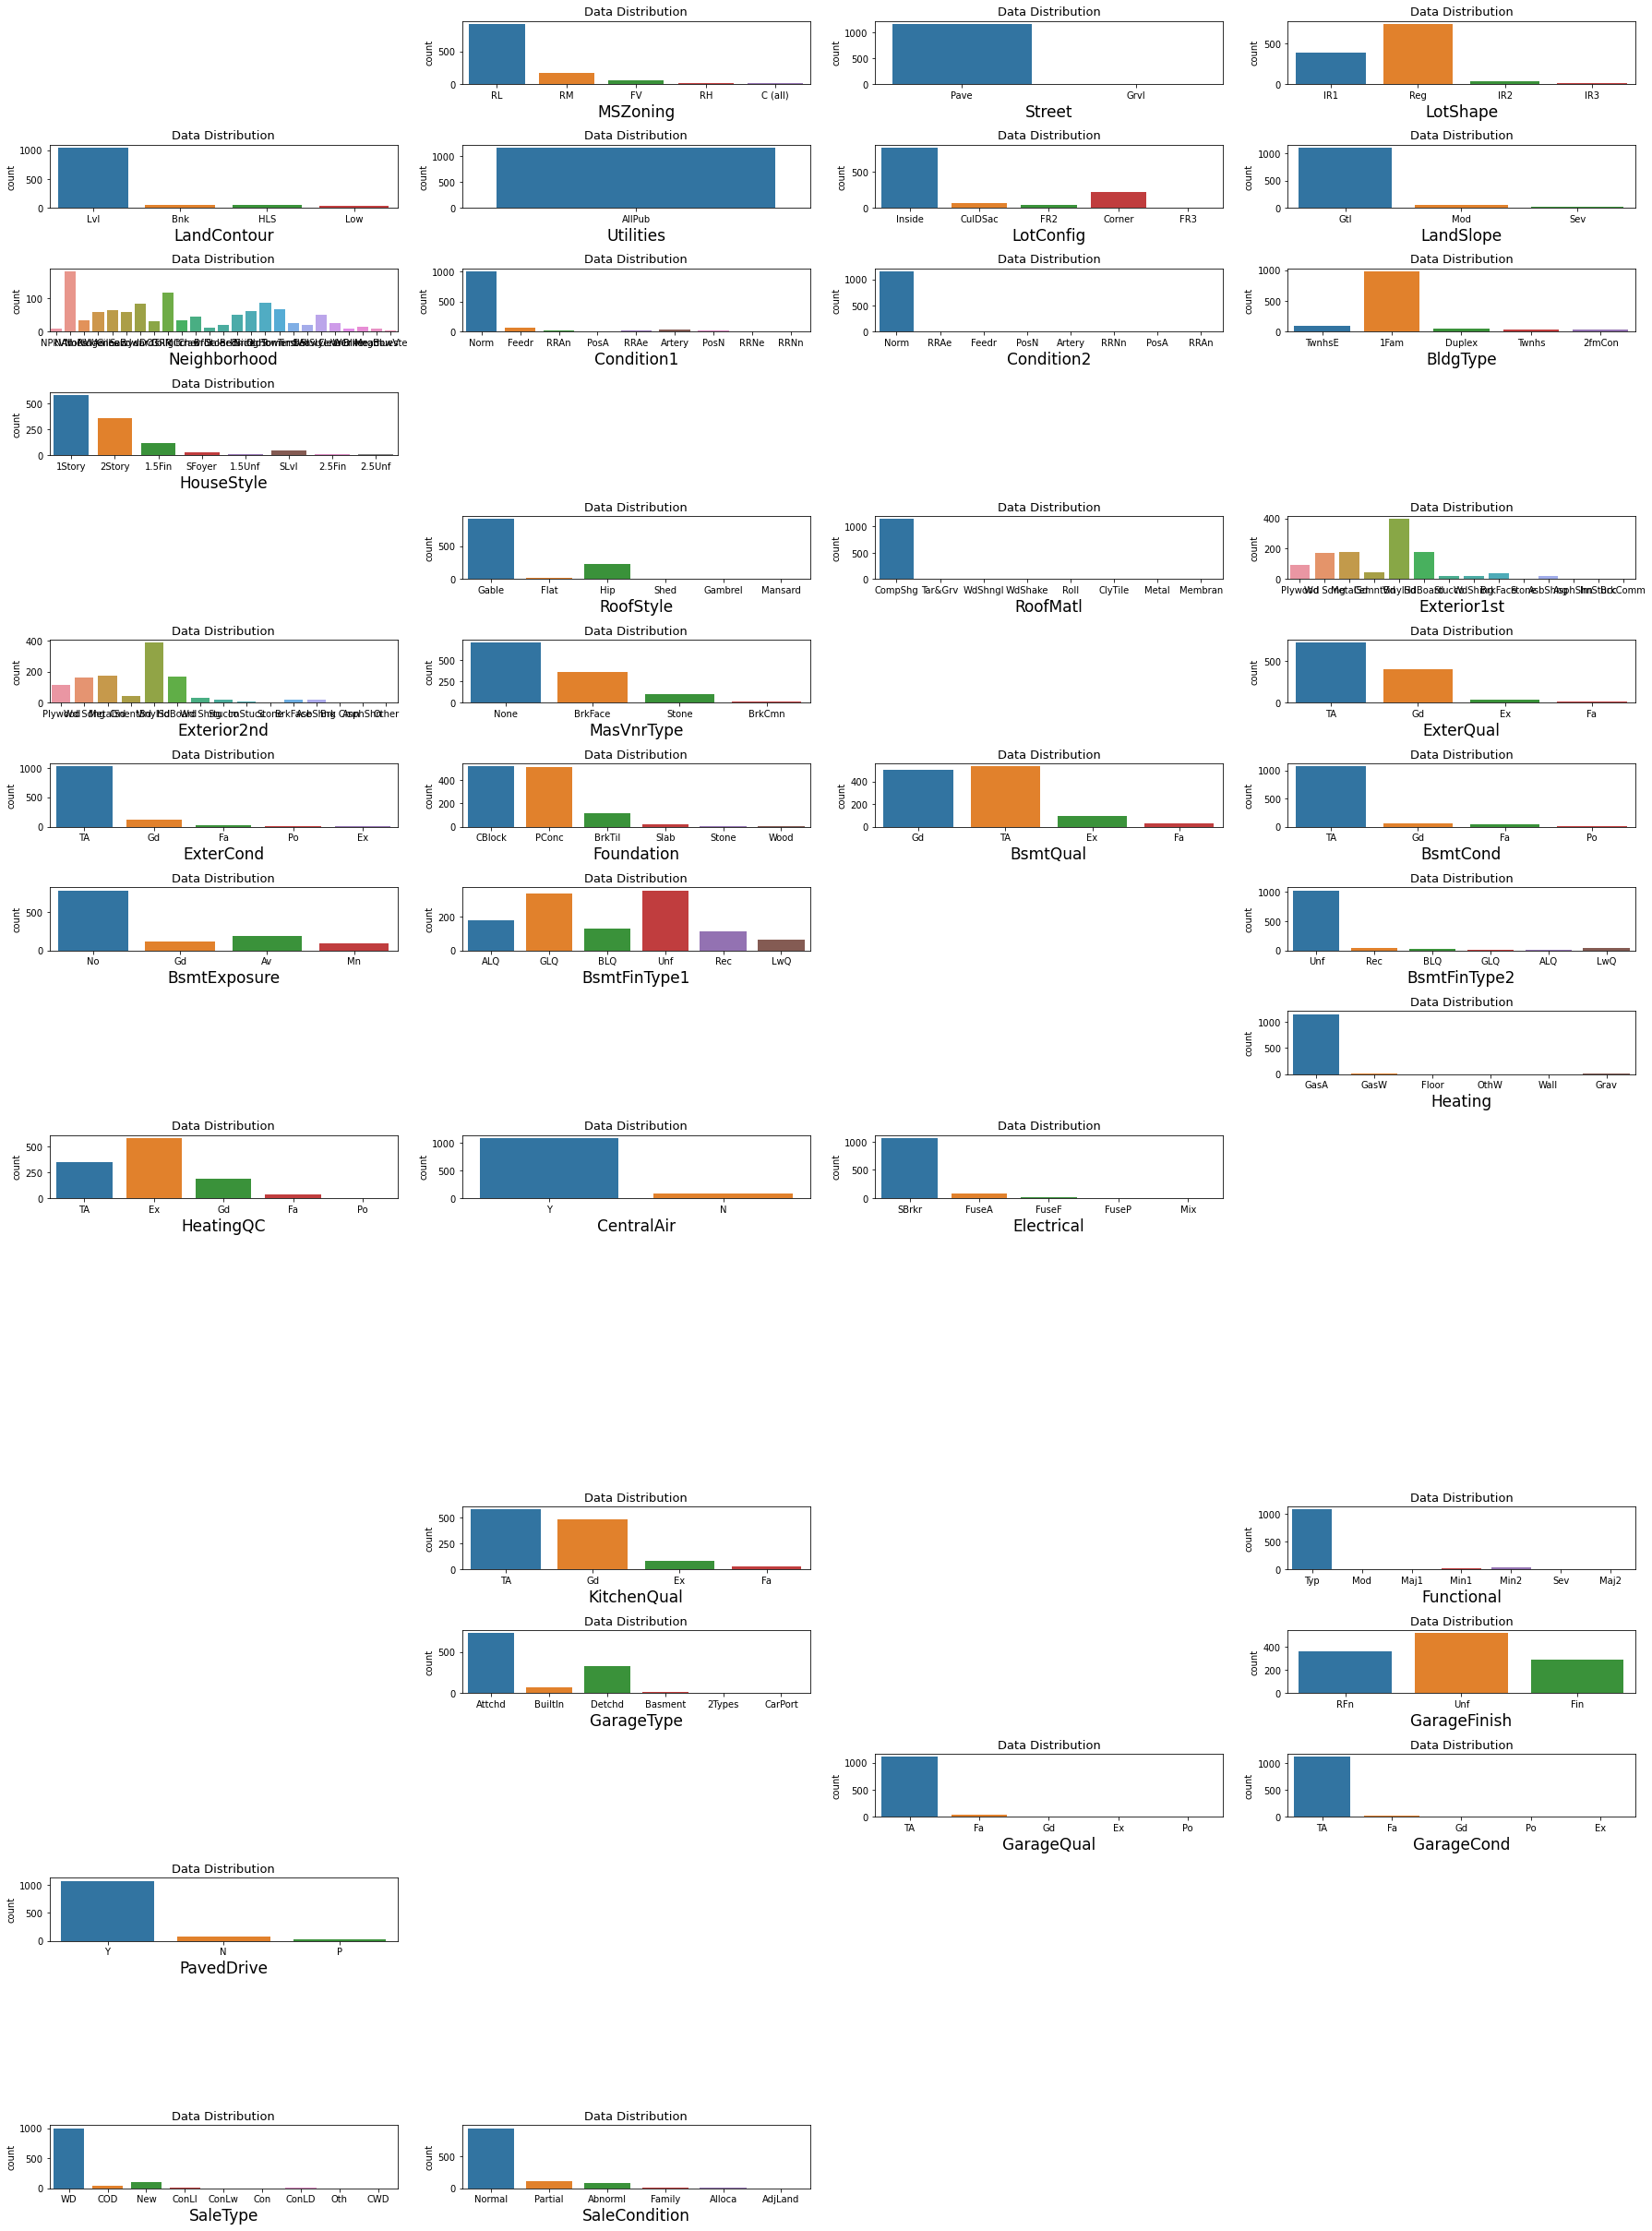

In [23]:
plt.figure(figsize=[25,35])

plotnumber = 1

for column in train:
    if train[column].dtypes=="object" and plotnumber<=76:
        ax = plt.subplot(19,4,plotnumber)
        sns.countplot(x=train[column],)
        plt.xlabel(column,fontsize=17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber+=1
plt.tight_layout()

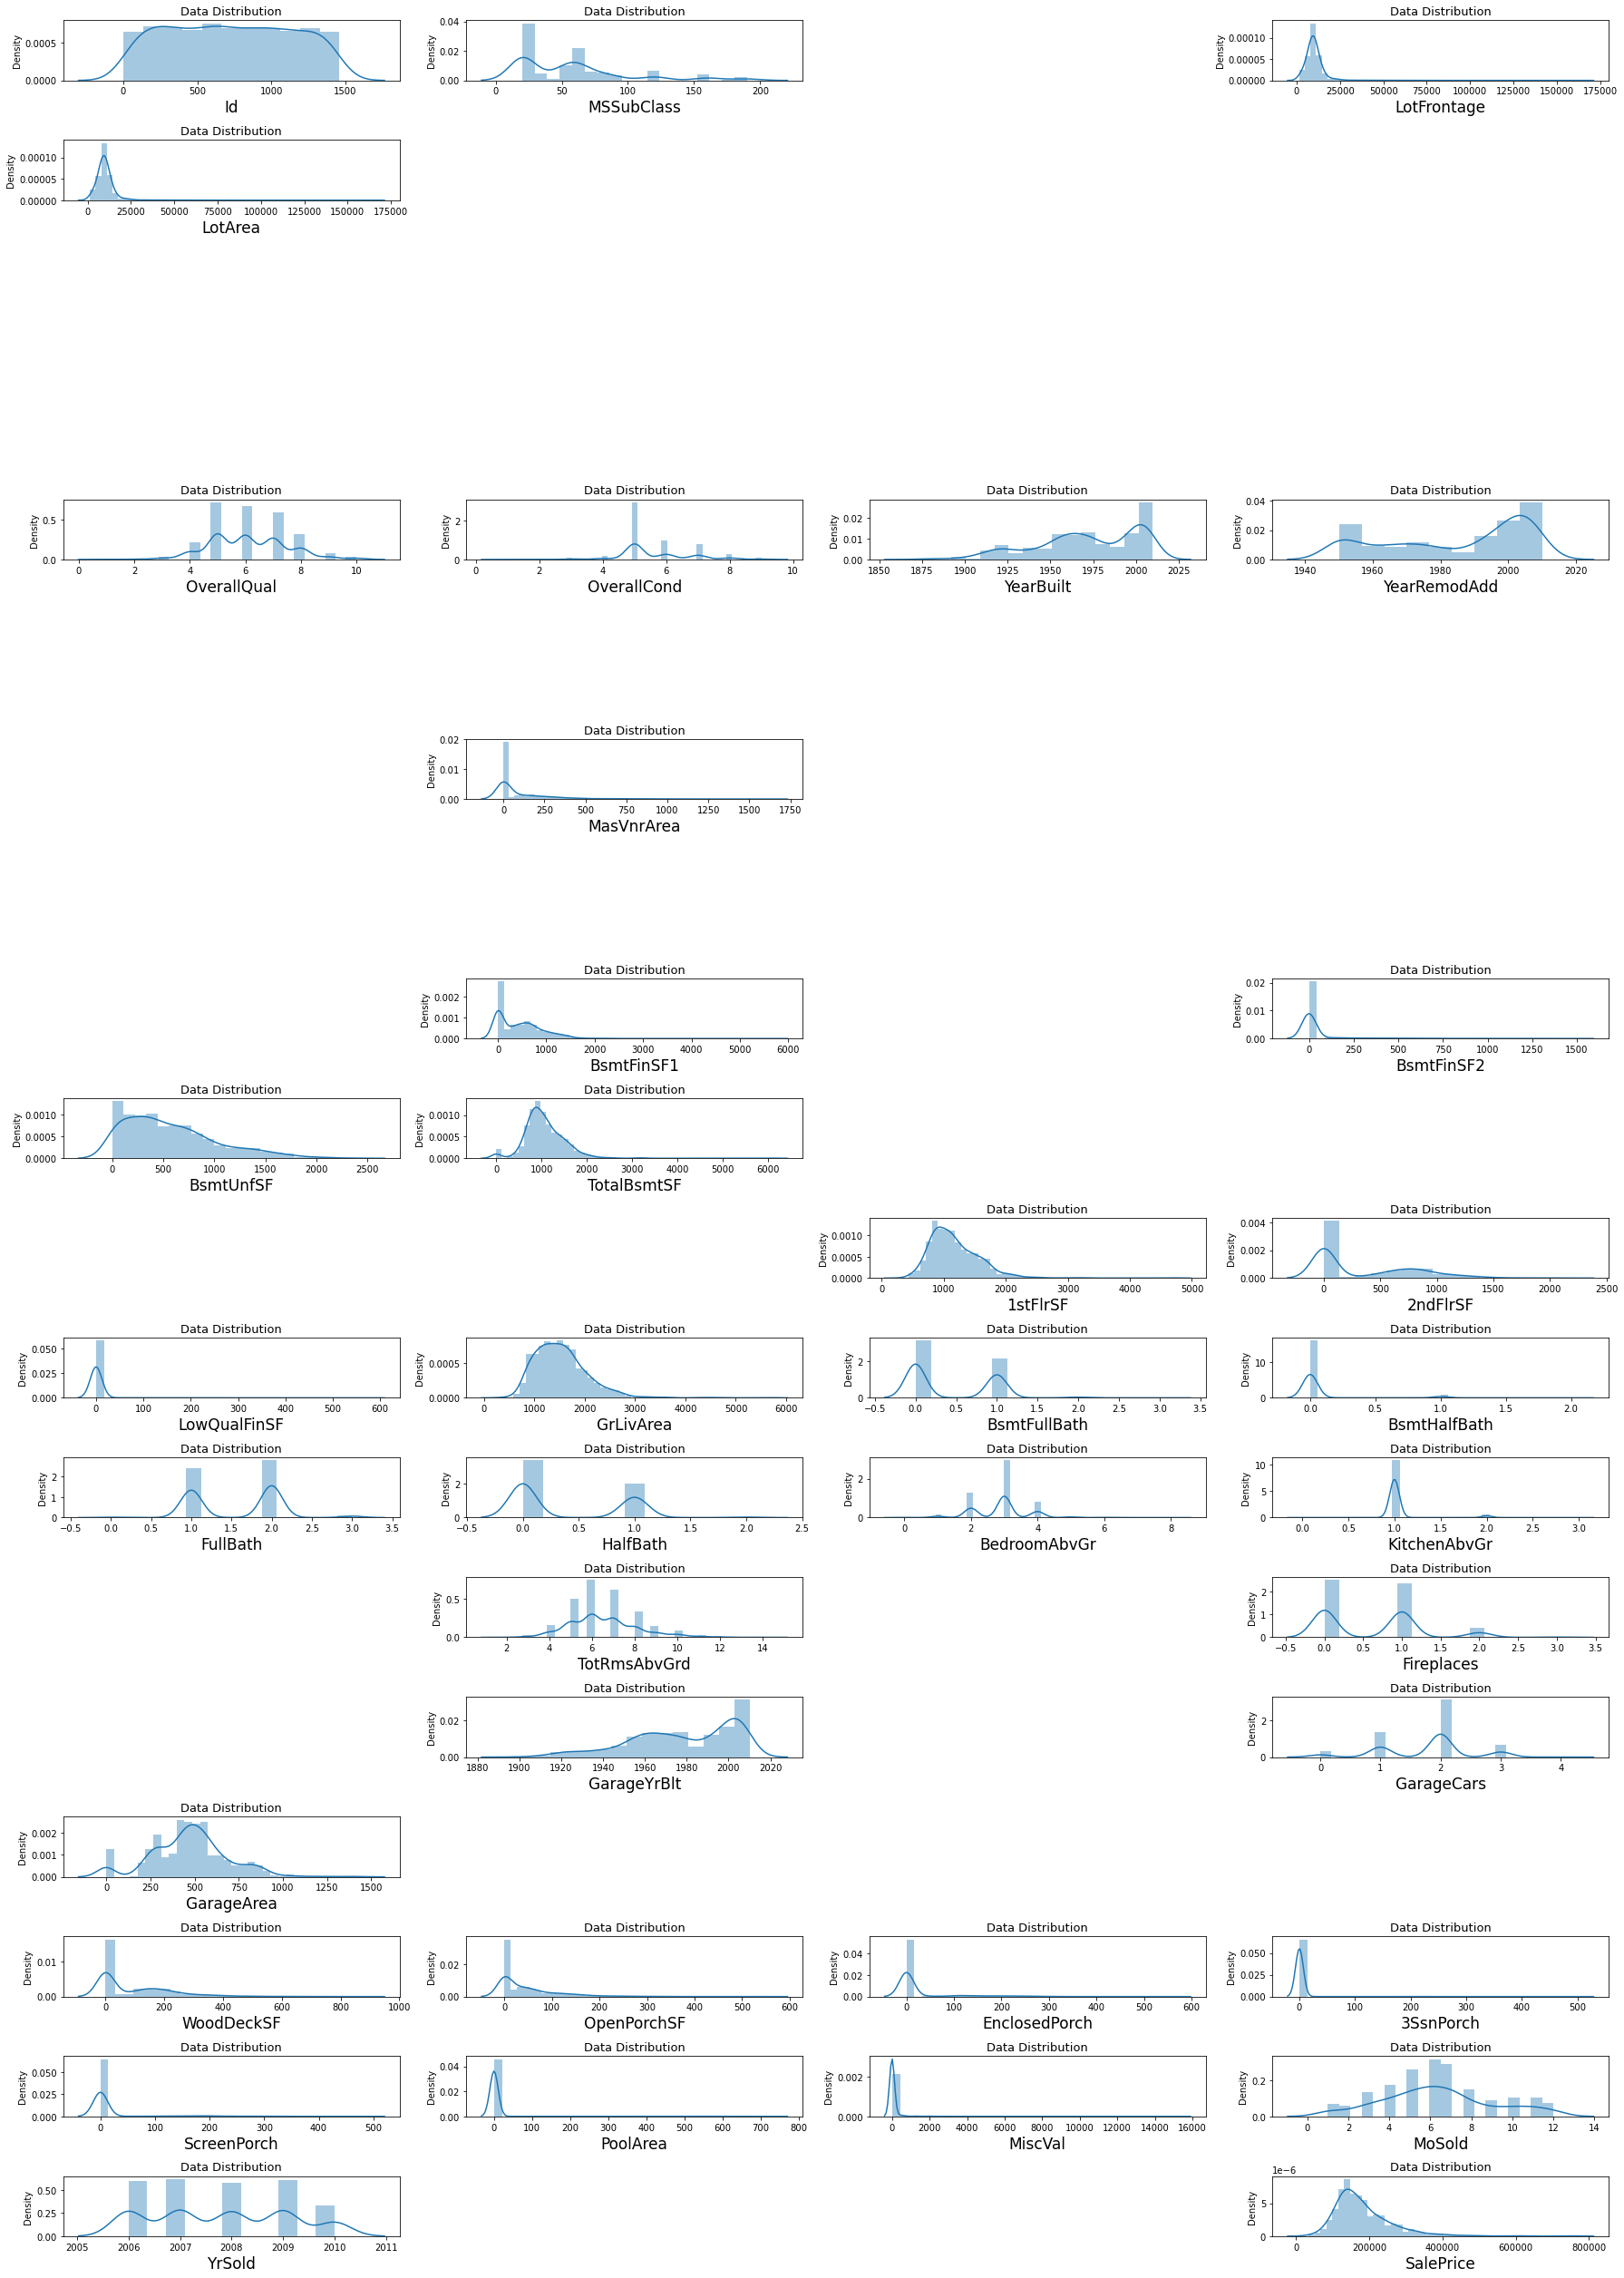

In [116]:
plt.figure(figsize=[25,35])
plotnumber = 1

for column in train:
    if train[column].dtypes=="int64" or train[column].dtypes=="float64" and plotnumber<=76:
        ax = plt.subplot(19,4,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber+=1
plt.tight_layout()

In [134]:
train.skew()

MSSubClass        1.422019
LotFrontage      10.659285
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835352
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.607961
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

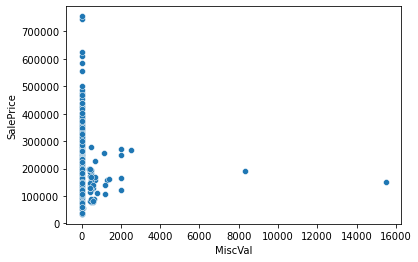

In [16]:
sns.scatterplot(x=train['MiscVal'],y=train['SalePrice'])

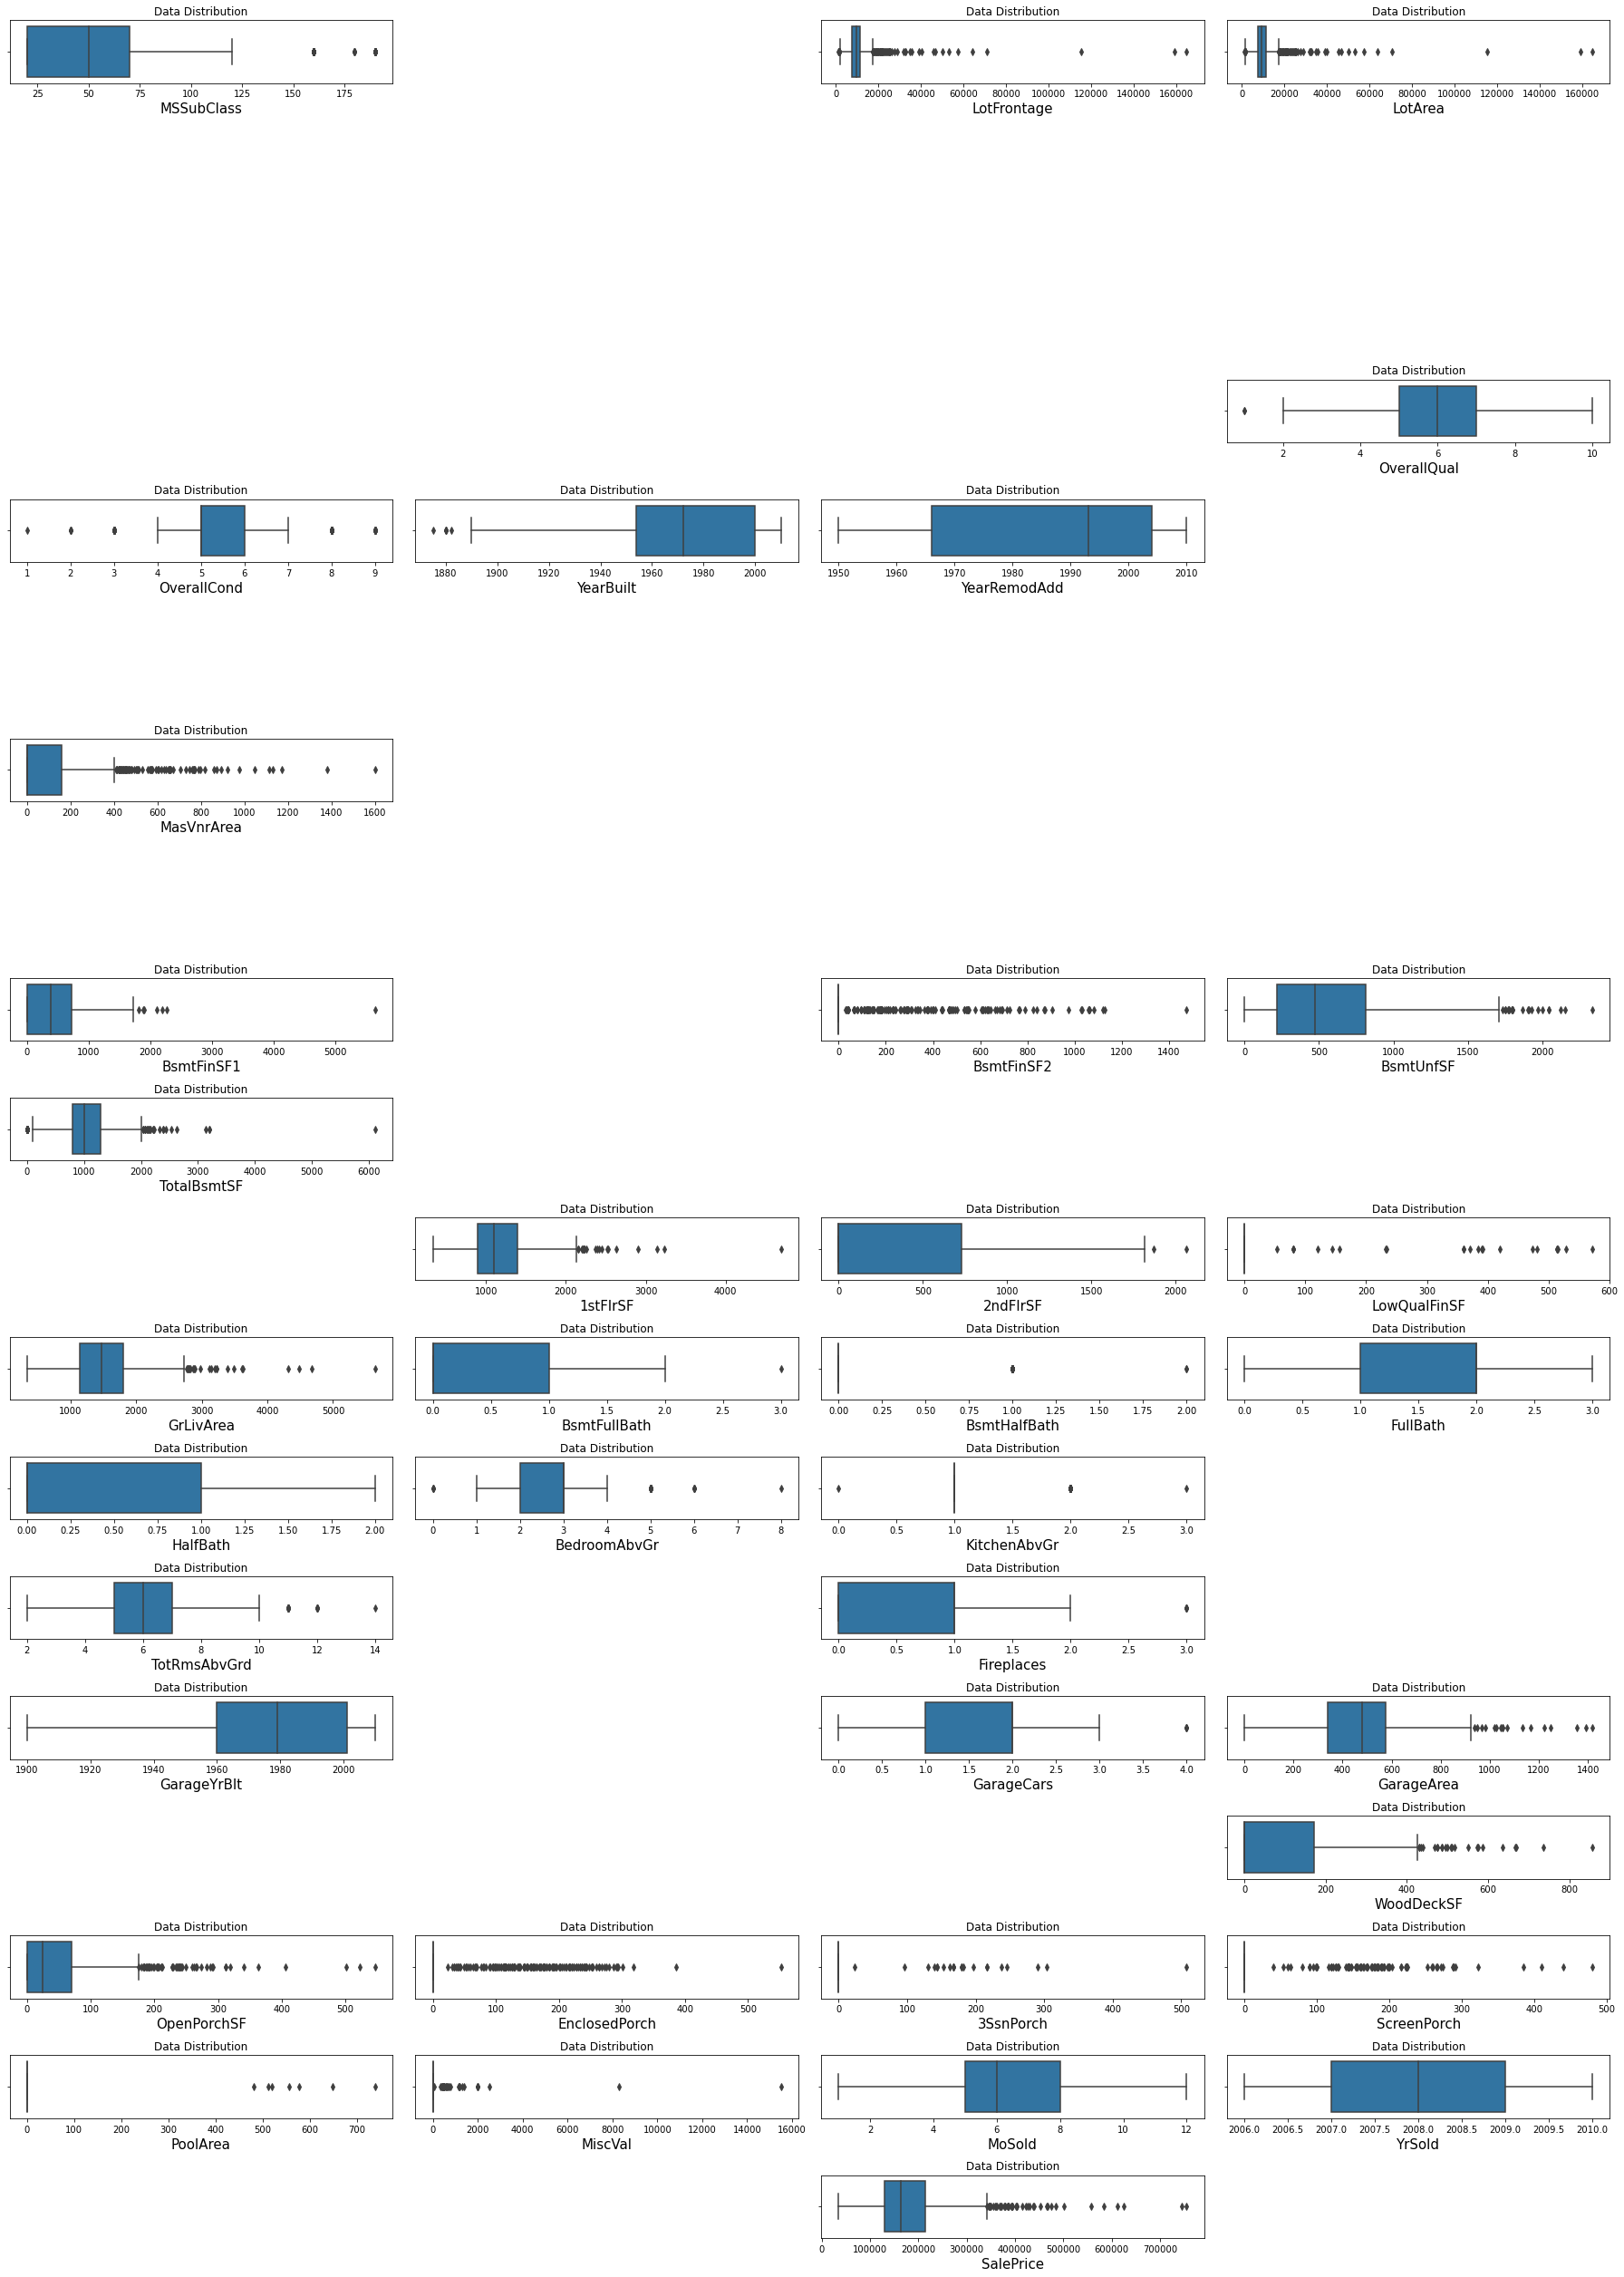

In [138]:
#Checking for outliers in the dataset.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in train:
    if train[column].dtypes=="int64" or train[column].dtypes=="float64" and plotnumber<=76:
        ax = plt.subplot(19,4,plotnumber)
        sns.boxplot(x = train[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 12)
    plotnumber += 1
plt.tight_layout()

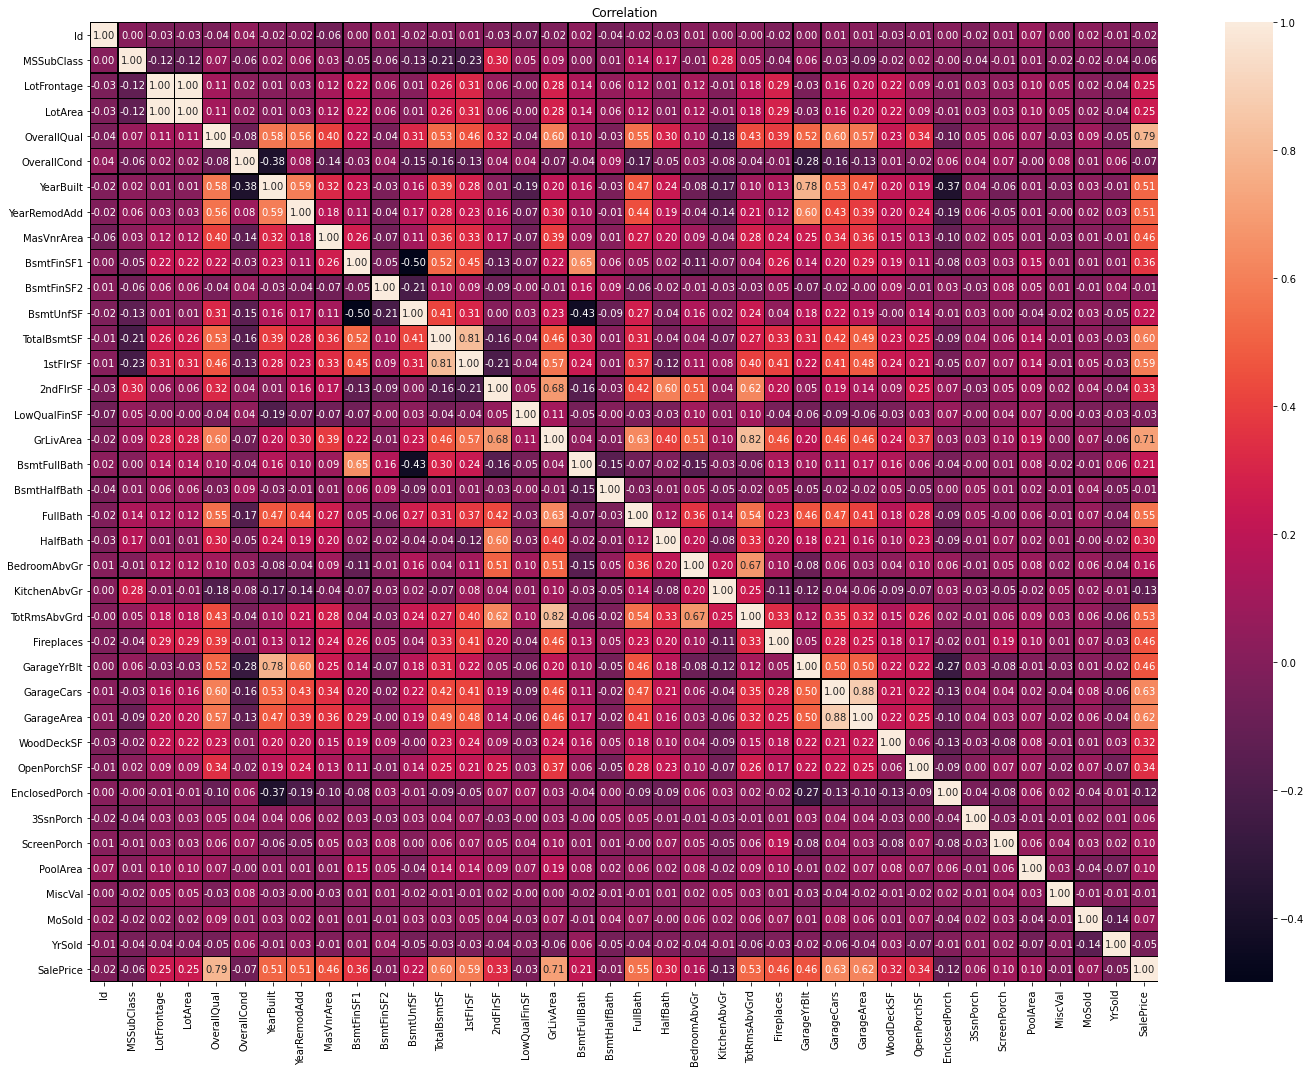

In [125]:
plt.figure(figsize = [20,15])
sns.heatmap(train.corr(),annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

**Data Cleaning**

dropping column id and other columns which have high skewness and too many outliers in them.

In [8]:
train.drop(columns=['Id','LotFrontage','LotArea','PoolArea','MiscVal'],axis=1, inplace=True)

In [10]:
train.drop(columns=['LowQualFinSF', '3SsnPorch'], axis =1, inplace = True)

In [11]:
train.skew()

MSSubClass       1.422019
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.579204
YearRemodAdd    -0.495864
MasVnrArea       2.835352
BsmtFinSF1       1.871606
BsmtFinSF2       4.365829
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
1stFlrSF         1.513707
2ndFlrSF         0.823479
GrLivArea        1.449952
BsmtFullBath     0.627106
BsmtHalfBath     4.264403
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
KitchenAbvGr     4.365259
TotRmsAbvGrd     0.644657
Fireplaces       0.671966
GarageYrBlt     -0.607961
GarageCars      -0.358556
GarageArea       0.189665
WoodDeckSF       1.504929
OpenPorchSF      2.410840
EnclosedPorch    3.043610
ScreenPorch      4.105741
MoSold           0.220979
YrSold           0.115765
SalePrice        1.953878
dtype: float64

In [12]:
q = train['MSSubClass'].quantile(0.99)
train['MSSubClass'] = train[train['MSSubClass']<q]

q = train['ScreenPorch'].quantile(0.98)
train['ScreenPorch'] = train[train['ScreenPorch']<q]


q = train['EnclosedPorch'].quantile(0.98)
train['EnclosedPorch'] = train[train['EnclosedPorch']<q]


q = train['OpenPorchSF'].quantile(0.99)
train['OpenPorchSF'] = train[train['OpenPorchSF']<q]


q = train['WoodDeckSF'].quantile(0.99)
train['WoodDeckSF'] = train[train['WoodDeckSF']<q]


q = train['KitchenAbvGr'].quantile(0.98)
train['KitchenAbvGr'] = train[train['KitchenAbvGr']<q]

q = train['BsmtHalfBath'].quantile(0.98)
train['BsmtHalfBath'] = train[train['BsmtHalfBath']<q]

q = train['GrLivArea'].quantile(0.99)
train['GrLivArea'] = train[train['GrLivArea']<q]


q = train['1stFlrSF'].quantile(0.99)
train['1stFlrSF'] = train[train['1stFlrSF']<q]                             


q = train['TotalBsmtSF'].quantile(0.99)
train['TotalBsmtSF'] = train[train['TotalBsmtSF']<q]

q = train['BsmtFinSF2'].quantile(0.98)
train['BsmtFinSF2'] = train[train['BsmtFinSF2']<q]


q = train['BsmtFinSF1'].quantile(0.99)
train['BsmtFinSF1'] = train[train['BsmtFinSF1']<q]


q = train['MasVnrArea'].quantile(0.99)
train['MasVnrArea'] = train[train['MasVnrArea']<q]

In [13]:
x = train.iloc[:, :-1]
y = train.iloc[:, [-1]]

In [14]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

for column in x:
    if x[column].dtypes=="int64" or x[column].dtypes=="float64":
        z = np.abs(stats.zscore(x[column]))
        i = np.where(z>3)[0]
print(z)

[0.60548713 0.60548713 0.60548713 ... 0.8992128  0.14686284 1.3578371 ]


In [15]:
x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [16]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in x.columns:
    if x[i].dtypes=="object":
        x[i] = LE.fit_transform(x[i].values.reshape(-1,1))

In [17]:
x.shape

(1168, 68)

In [18]:
y.shape

(1168, 1)

**Model Building**

In [19]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVR = SVR()
ABR = AdaBoostRegressor()

In [22]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 900)

In [46]:
#training with the all of them

LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
SVR.fit(x_train,y_train)
ABR.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [47]:
#Accuracy scores
print('Linear Regression =',LR.score(x_test,y_test))
print('Decision Tree =',DT.score(x_test,y_test))
print('Random Forest =',RF.score(x_test,y_test))
print('SVC =',SVR.score(x_test,y_test))
print('Ada Boost Regressor =',ABR.score(x_test,y_test))

Logistic Regression = 0.7875161140737098
Decision Tree = 0.7053776058767842
Random Forest = 0.8346801059676932
SVC = -0.05018030005483287
Ada Boost Regressor = 0.7593358091151472


In [48]:
#Mean Squared Error
print('Linear Regression =', mean_squared_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF.predict(x_test)))
print('SVC =', mean_squared_error(y_test,SVR.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR.predict(x_test)))

Logistic Regression = 1597238017.4727168
Decision Tree = 2214671887.428082
Random Forest = 1242707034.6622005
SVC = 7894188743.471884
Ada Boost Regressor = 1809068925.155783


In [49]:
#Mean Absolute Error
print('Linear Regression =', mean_absolute_error(y_test,LR.predict(x_test)))
print('Decision Tree =', mean_absolute_error(y_test,DT.predict(x_test)))
print('Random Forest =', mean_absolute_error(y_test,RF.predict(x_test)))
print('SVR =', mean_absolute_error(y_test,SVR.predict(x_test)))
print('Ada Boost Regressor =', mean_absolute_error(y_test,ABR.predict(x_test)))

Logistic Regression = 25804.4621894279
Decision Tree = 32277.83904109589
Random Forest = 22600.64815068493
SVR = 56920.38700610702
Ada Boost Regressor = 29732.620847228787


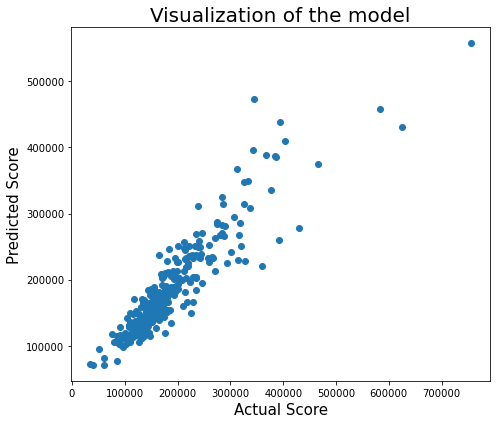

In [50]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,RF.predict(x_test))
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [51]:
#Checking Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.7673608874789977

**HyperParameter Tuning**

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
LR_Params = {'copy_X':[True,False],
         'fit_intercept':[True,False],
        'normalize' :[True,False]}

DT_Params = {'criterion':['mse','mae'],
        'splitter': ['best', 'random'],
          'min_samples_leaf': [2,8],
         'min_samples_split': [2,3],
         'max_depth':[5,6]}


RF_Params =  {'n_estimators':[140,160],
         'max_depth':[24,32],
         'min_samples_leaf': [2,8],
         'min_samples_split': [2,3],
             'random_state':[900,400]}


SVR_Params = {'coef0':[1.0,1.4],
         'C':[0.25,0.30],
          'max_iter':[1,2]}

ABR_Params = {'n_estimators':[100,120],
        'learning_rate' :[0.25,0.30],
          'loss' : ['linear', 'square', 'exponential']}

In [55]:
LR_grid = GridSearchCV(LR, param_grid= LR_Params, cv = 2, n_jobs=-1)

DT_grid = GridSearchCV(DT, param_grid= DT_Params, cv = 2, n_jobs=-1)

RF_grid = GridSearchCV(RF, param_grid= RF_Params, cv = 2, n_jobs=-1)

SVR_grid = GridSearchCV(SVR, param_grid= SVR_Params, cv = 2, n_jobs=-1)

ABR_grid = GridSearchCV(ABR, param_grid= ABR_Params, cv = 2, n_jobs=-1)

In [56]:
LR_grid.fit(x_train,y_train)

DT_grid.fit(x_train,y_train)

RF_grid.fit(x_train,y_train)

SVR_grid.fit(x_train,y_train)

ABR_grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.3],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 120]})

In [57]:
print('Best Estimators == > \n', LR_grid.best_params_)
print('Best Estimators == > \n', DT_grid.best_params_)
print('Best Estimators == > \n', RF_grid.best_params_)
print('Best Estimators == > \n', SVR_grid.best_params_)
print('Best Estimators == > \n', ABR_grid.best_params_)

Best Estimators == > 
 {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best Estimators == > 
 {'criterion': 'mae', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}
Best Estimators == > 
 {'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140, 'random_state': 400}
Best Estimators == > 
 {'C': 0.3, 'coef0': 1.0, 'max_iter': 2}
Best Estimators == > 
 {'learning_rate': 0.3, 'loss': 'exponential', 'n_estimators': 100}


In [58]:
LR_clf= LR_grid.best_estimator_

DT_clf= DT_grid.best_estimator_

RF_clf= RF_grid.best_estimator_

SVR_clf= SVR_grid.best_estimator_

ABR_clf= ABR_grid.best_estimator_

In [59]:
print("Linear Regression",LR_clf.fit(x_train, y_train))
print("Decision Tree Regression",DT_clf.fit(x_train, y_train))
print("Random Forest Regression",RF_clf.fit(x_train, y_train))
print("Suport Vectore Regression",SVR_clf.fit(x_train, y_train))
print("Adaboost Regression",ABR_clf.fit(x_train, y_train))

Linear Regression LinearRegression()
Decision Tree Regression DecisionTreeRegressor(criterion='mae', max_depth=6, min_samples_leaf=8)
Random Forest Regression RandomForestRegressor(max_depth=24, min_samples_leaf=2, n_estimators=140,
                      random_state=400)
Suport Vectore Regression SVR(C=0.3, coef0=1.0, max_iter=2)
Adaboost Regression AdaBoostRegressor(learning_rate=0.3, loss='exponential', n_estimators=100)


In [61]:
#Accuracy scores
print('Linear Regression =',LR_clf.score(x_test,y_test))
print('Decision Tree =',DT_clf.score(x_test,y_test))
print('Random Forest =',RF_clf.score(x_test,y_test))
print('SVC =',SVR_clf.score(x_test,y_test))
print('Ada Boost Regressor =',ABR_clf.score(x_test,y_test))

Logistic Regression = 0.7875161140737098
Decision Tree = 0.6395844871585634
Random Forest = 0.8191432271695189
SVC = -1.728284281011832
Ada Boost Regressor = 0.7746980631103695


In [60]:
#Accuracy score
print('Linear Regression =', mean_squared_error(y_test,LR_clf.predict(x_test)))
print('Decision Tree =', mean_squared_error(y_test,DT_clf.predict(x_test)))
print('Random Forest =', mean_squared_error(y_test,RF_clf.predict(x_test)))
print('SVC =', mean_squared_error(y_test,SVR_clf.predict(x_test)))
print('Ada Boost Regressor =', mean_squared_error(y_test,ABR_clf.predict(x_test)))

Logistic Regression = 1597238017.4727168
Decision Tree = 2709237722.605308
Random Forest = 1359497507.4132411
SVC = 20508469887.532974
Ada Boost Regressor = 1693591104.2929199


In [142]:
# Checking Cross Validation Score
from sklearn.model_selection import cross_val_score

cvs_svc = cross_val_score(RF_clf,x,y,cv=3)

cvs_svc.mean()

0.8278356524106053

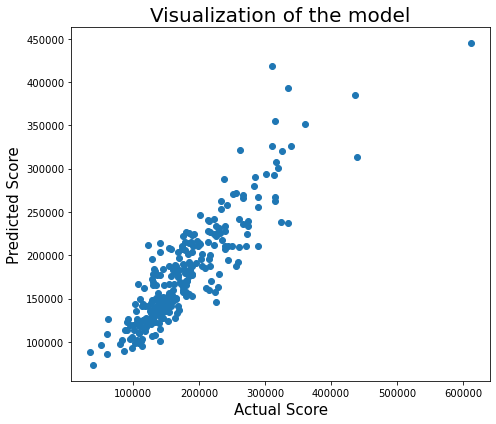

In [143]:
plt.figure(figsize = [7,6])
plt.scatter(y_test,RF_clf.predict(x_test))
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

**Using Test Set to predict the Loan_Status**

In [62]:
test = pd.read_csv('test.csv')

In [63]:
test.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  

[2 rows x 80 columns]

In [65]:
testing = test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id','LotFrontage','LotArea','PoolArea','MiscVal','LowQualFinSF', '3SsnPorch'], axis = 1)

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0            20       RL   Pave      IR1         HLS    AllPub    Corner   
1           120       RL   Pave      IR1         Lvl    AllPub   CulDSac   
2            20       RL   Pave      Reg         Lvl    AllPub    Inside   
3            70       RL   Pave      Reg         Bnk    AllPub    Inside   
4            60       RL   Pave      IR1         Lvl    AllPub   CulDSac   
..          ...      ...    ...      ...         ...       ...       ...   
287          20       RL   Pave      Reg         Lvl    AllPub    Inside   
288          20       RL   Pave      IR2         Lvl    AllPub    Inside   
289          20       RL   Pave      IR1         Lvl    AllPub   CulDSac   
290          50       RM   Pave      Reg         Lvl    AllPub    Corner   
291         160       RM   Pave      Reg         Lvl    AllPub    Inside   

    LandSlope Neighborhood Condition1  ... GarageCond PavedDrive WoodDeckSF  \
0         Gtl      StoneBr       Norm  ...         TA          Y        178   
1         Gtl      StoneBr       Norm  ...         TA          Y         63   
2         Gtl      CollgCr       Norm  ...         TA          Y        202   
3         Gtl      Crawfor       Norm  ...         TA          Y          0   
4         Gtl      Somerst      Feedr  ...         TA          Y        100   
..        ...          ...        ...  ...        ...        ...        ...   
287       Gtl      Somerst       Norm  ...         TA          Y        144   
288       Gtl      CollgCr       Norm  ...         TA          Y          0   
289       Gtl        NAmes       Norm  ...         TA          Y          0   
290       Gtl      BrkSide      Feedr  ...         TA          Y          0   
291       Gtl       BrDale       Norm  ...         TA          Y         72   

     OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold YrSold SaleType  \
0             51              0            0       7   2007       WD   
1              0              0            0       8   2009      COD   
2            151              0            0       6   2009       WD   
3              0              0            0       7   2009       WD   
4             18              0            0       1   2008       WD   
..           ...            ...          ...     ...    ...      ...   
287           99              0            0      10   2008       WD   
288            0              0            0       2   2008       WD   
289            0              0            0       3   2010       WD   
290           24             36            0      10   2006       WD   
291            0              0            0       6   2006       WD   

    SaleCondition  
0          Normal  
1         Abnorml  
2          Normal  
3          Normal  
4          Normal  
..            ...  
287        Normal  
288        Normal  
289        Normal  
290        Normal  
291        Normal  

[292 rows x 68 columns]

In [70]:
testing.fillna(method='ffill', inplace = True)

In [71]:
#Lets first convert the string values in int for further processing of data with the help of label encoder.

for i in testing.columns:
    if testing[i].dtypes=="object":
        testing[i] = LE.fit_transform(testing[i].values.reshape(-1,1))

In [73]:
Sale_Price = RF_clf.predict(scaler.transform(testing))

In [75]:
Sale_Price

array([355164.96505102, 259641.72858844, 267376.49375   , 183738.47689342,
       226642.74690476,  90517.30191043, 142947.75238095, 331180.29643991,
       224017.02947846, 174878.92729592,  87462.65758503, 148955.49533447,
       109552.98531179, 151591.41293651, 279836.21606293, 114211.64826531,
       120236.64088435, 133968.76460884, 188324.62806122, 194350.81961451,
       168815.93197279, 153815.3220805 , 147176.15056689,  98632.72303855,
       106451.0564966 , 129214.0539229 , 186686.89013039, 137746.64196712,
       187879.3872449 , 106516.42112245, 162863.93471088, 198141.14719388,
       203072.29219388, 161725.27278912, 114324.92867347, 178369.5910941 ,
       181666.15462585, 125094.46193027, 159456.75663265, 161762.06819728,
       111729.4872449 , 306859.965     , 205789.35628118, 179564.3026644 ,
       137909.31445578, 138544.82639456, 121885.94166667, 113807.80352041,
       210508.7872449 , 346098.98096939, 134047.57442177, 184920.12193878,
        97497.96102608,  

In [ ]:
Predictions = pd.DataFrame(Sale_Price)
Predictions.index = test.Id
Predictions.columns =["Sale_Price"]
Predictions.to_csv("Sale_Price_Predictions.csv")

**Saving The Model**

In [76]:
import joblib

In [77]:
filename = 'Sale_Price_Predictions_RegressionModel.sav'
joblib.dump(RF_clf, filename)

['Sale_Price_Predictions_RegressionModel.sav']